<img src="Archivos/miad4.png" width=900x>

 # TAREA 1

**Departamento de Ingeniería Industrial.**

**Maestría en Inteligencia Analítica para la Toma de Decisiones (Analytics).**

**Modelos de Análisis Estadístico (MIIA 4100) - 202320.**

Por ningún motivo se recibirán entregas posteriores a la hora límite. En caso de no realizar la entrega la nota asignada será 0.

Notas: La entrega del taller deberá hacerse en un informe autocontenido incluyendo las **gráficas,interpretación y conclusiones**. Adicionalmente debe entregarse el código utilizado en un archivo ipynb, de considerar necesario comentar todas las partes del codigo que crean necesarias para el entendimiento del codigo.

Para todos los literales que lo requieran, se recomienda utilizar una significancia del 5% (confianza del 95%). En caso de utilizar otro nivel de significancia, hacerlo explícito en el informe.

______________________________________________________________________



## Ejercicio 1
(40%) La base de datos contenida en resultadosicfes.csv tiene información de los 
resultados obtenidos en 2019, estos resultados muestran todos los departamentos de 
Colombia, por favor tomar como muestra los resultados de los siguientes 5 departamentos; La 
Guajira, Valle, Atlántico, Bogotá (la cual en las estadísticas se tiene como departamento) y 
Huila. El objetivo es realizar un análisis exploratorio de los datos.


a. (20%) Identifique las variables continuas y para CADA UNA de éstas:
- Determine cuántos valores perdidos tiene cada una.
- Calcule la media, desviación estándar, máximo y mínimo.
- Identifique los departamentos donde los estudiantes obtuvieron un puntaje en matemáticas mayor a 55, un puntaje en lectura mayor a 60 y un puntaje en ingles mayor a 70 reemplace estos valores por valores perdidos. En lo que sigue trabaje con estas variables corregidas.<br> 
- Calcule nuevamente la media, desviación estándar, máximo, mínimo. Compare los resultados con los hallados los 2 literales anteriores y comente. 

In [17]:
# Implementa tu respuesta en esta celda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#leemos los resultados del icfes
resultados_icfes = pd.read_csv('Archivos/resultadosicfes.csv', sep = ';',encoding='utf-8')

unique_departamentos = resultados_icfes['ESTU_DEPTO_RESIDE'].unique()
unique_departamentos

array(['MAGDALENA', 'BOGOTÃ\x81', 'BOLIVAR', 'ATLANTICO', 'VALLE',
       'SANTANDER', 'CUNDINAMARCA', 'SUCRE', 'ANTIOQUIA', 'CESAR',
       'BOYACA', 'HUILA', 'CASANARE', 'CAUCA', 'CORDOBA',
       'NORTE SANTANDER', 'QUINDIO', 'ARAUCA', 'META', 'CHOCO',
       'LA GUAJIRA', 'SAN ANDRES', 'TOLIMA', 'NARIÃ‘O', 'CALDAS',
       'VAUPES', 'RISARALDA', 'PUTUMAYO', 'VICHADA', 'CAQUETA', nan,
       'AMAZONAS', 'GUAVIARE', 'GUAINIA', 'EXTRANJERO'], dtype=object)

Primero lo que me gustaría saber es cuantos departamento unicos hay en nuestra base de datos, o si algun departamento esta mal escrito en alguno de los literales.
Vemos que Bogotá está escrita 'BOGOTÃ\x81' luego asi la vamos a buscar en nuestra base de datos. 


In [2]:
#Creamos los departamentos que queremos analizar
departamentos=['LA GUAJIRA','VALLE','ATLANTICO','BOGOTÃ\x81','HUILA']
#Tomamos la columna Estu_Depto_Reside y solo tomamos los departamentos que queremos analizar
resultados_icfes_5= resultados_icfes.loc[resultados_icfes['ESTU_DEPTO_RESIDE'].isin(departamentos)]

#Queremos saber cuales son las variables continuas y cuales son las categoricaa
data_type=resultados_icfes_5.dtypes
data_type


ESTU_GENERO                  object
ESTU_DEPTO_RESIDE            object
FAMI_ESTRATOVIVIENDA         object
COLE_NATURALEZA              object
COLE_AREA_UBICACION          object
COLE_JORNADA                 object
PUNT_LECTURA_CRITICA          int64
PUNT_MATEMATICAS              int64
PUNT_C_NATURALES              int64
PUNT_SOCIALES_CIUDADANAS      int64
PUNT_INGLES                 float64
PUNT_GLOBAL                   int64
PERCENTIL_GLOBAL            float64
dtype: object

Vemos que laas variables a ser potencialmente continuas son PUNT_LECTURA_CRITICA          int64
PUNT_MATEMATICAS              int64
PUNT_C_NATURALES              int64
PUNT_SOCIALES_CIUDADANAS      int64
PUNT_INGLES                 float64
PUNT_GLOBAL                   int64
PERCENTIL_GLOBAL            float64

In [3]:
#Guardamos las variables_ continuas en una lista
variables_continuas = ['PUNT_MATEMATICAS','PUNT_LECTURA_CRITICA','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES','PUNT_GLOBAL','PERCENTIL_GLOBAL']

##Valores perdidos para cada variable Punto a_1
resultados_icfes_5[variables_continuas].isnull().sum()

PUNT_MATEMATICAS            0
PUNT_LECTURA_CRITICA        0
PUNT_C_NATURALES            0
PUNT_SOCIALES_CIUDADANAS    0
PUNT_INGLES                 1
PUNT_GLOBAL                 0
PERCENTIL_GLOBAL            1
dtype: int64

Vemos que casi no hay valores nullos para estas variables, solo hay dos varlores nullos correspondientes a punt_ingles y percentil_global

In [7]:
summary_group=resultados_icfes_5.groupby('ESTU_DEPTO_RESIDE')[variables_continuas].describe()
summary_group

PUNT_MATEMATICAS                                          \
                             count       mean        std   min   25%   50%   
ESTU_DEPTO_RESIDE                                                            
ATLANTICO                  32179.0  49.291401  11.857822  15.0  41.0  49.0   
BOGOTÃ                    83600.0  54.745108  11.313299  16.0  47.0  55.0   
HUILA                      14088.0  51.728421  11.819935   0.0  43.0  52.0   
LA GUAJIRA                  8840.0  44.684842  11.261710   0.0  36.0  44.0   
VALLE                      38640.0  49.250336  11.461553   0.0  41.0  49.0   

                               PUNT_LECTURA_CRITICA             ...  \
                    75%    max                count       mean  ...   
ESTU_DEPTO_RESIDE                                               ...   
ATLANTICO          57.0  100.0              32179.0  51.423071  ...   
BOGOTÃ            63.0  100.0              83600.0  55.686627  ...   
HUILA              60.0  100.0              14088.0  52.474801  ...   
LA GUAJIRA         52.0   83.0               8840.0  46.876131  ...   
VALLE              57.0  100.0              38640.0  51.838199  ...   

                  PUNT_GLOBAL        PERCENTIL_GLOBAL                        \
                          75%    max            count       mean        std   
ESTU_DEPTO_RESIDE                                                             
ATLANTICO               277.0  437.0          32179.0  47.185711  29.308042   
BOGOTÃ                 301.0  477.0          83600.0  61.448744  26.611648   
HUILA                   286.0  442.0          14088.0  52.082269  28.419039   
LA GUAJIRA              248.0  419.0           8839.0  34.136554  26.780097   
VALLE                   277.0  457.0          38640.0  48.223939  28.232360   

                                                 
                   min   25%   50%   75%    max  
ESTU_DEPTO_RESIDE                                
ATLANTICO          1.0  21.0  45.0  72.0  100.0  
BOGOTÃ            1.0  41.0  65.0  84.0  100.0  
HUILA              1.0  28.0  52.0  77.0  100.0  
LA GUAJIRA         1.0  11.0  28.0  53.0  100.0  
VALLE              1.0  24.0  48.0  72.0  100.0  

[5 rows x 56 columns]

In [11]:
media_variables=resultados_icfes_5[variables_continuas].mean()
std_variables=resultados_icfes_5[variables_continuas].std()
max_variables=resultados_icfes_5[variables_continuas].max()
min_variables=resultados_icfes_5[variables_continuas].min()

agregacion=pd.DataFrame({'Media':media_variables,'Desviacion Estandar':std_variables,'Maximo':max_variables,'Minimo':min_variables})
agregacion

,Media,Desviacion Estandar,Maximo,Minimo
PUNT_MATEMATICAS,51.817262,11.876710,100.0,0.0
PUNT_LECTURA_CRITICA,53.380226,10.416497,100.0,0.0
PUNT_C_NATURALES,49.546606,10.752327,100.0,0.0
PUNT_SOCIALES_CIUDADANAS,47.635641,12.228414,100.0,0.0
PUNT_INGLES,50.693926,12.870041,100.0,0.0
PUNT_GLOBAL,253.013211,51.465233,477.0,0.0
PERCENTIL_GLOBAL,53.874037,28.723295,100.0,1.0


In [14]:

condiciones= (resultados_icfes_5['PUNT_MATEMATICAS']>55) & (resultados_icfes_5['PUNT_LECTURA_CRITICA']>60) & (resultados_icfes_5['PUNT_INGLES']>70)
resultados_icfes_5.loc[condiciones,['PUNT_MATEMATICAS','PUNT_LECTURA_CRITICA','PUNT_INGLES']]=np.nan


In [15]:
media_variables=resultados_icfes_5[variables_continuas].mean()
std_variables=resultados_icfes_5[variables_continuas].std()
max_variables=resultados_icfes_5[variables_continuas].max()
min_variables=resultados_icfes_5[variables_continuas].min()

agregacion=pd.DataFrame({'Media':media_variables,'Desviacion Estandar':std_variables,'Maximo':max_variables,'Minimo':min_variables})
agregacion

,Media,Desviacion Estandar,Maximo,Minimo
PUNT_MATEMATICAS,50.604052,11.119918,100.0,0.0
PUNT_LECTURA_CRITICA,52.314750,9.794356,100.0,0.0
PUNT_C_NATURALES,49.546606,10.752327,100.0,0.0
PUNT_SOCIALES_CIUDADANAS,47.635641,12.228414,100.0,0.0
PUNT_INGLES,48.916545,11.125430,100.0,0.0
PUNT_GLOBAL,253.013211,51.465233,477.0,0.0
PERCENTIL_GLOBAL,53.874037,28.723295,100.0,1.0


En el proceso de identificación de valores atípicos, hemos tomado la decisión de marcar como valores perdidos o "NA" aquellos casos en los que el puntaje de matemáticas sea mayor a 55, el puntaje de lectura sea mayor a 60 y el puntaje de inglés sea mayor a 70. Esta elección se basa en el análisis de la primera tabla de datos, donde observamos las siguientes medias:

- **PUNT_MATEMATICAS**: 51.817262 con una desviación estándar de 11.876710.
- **PUNT_LECTURA_CRITICA**: 53.380226 con una desviación estándar de 10.416497.
- **PUNT_INGLES**: 50.693926 con una desviación estándar de 12.870041.

Dado que los valores que hemos excluido en los tres tipos de materias son mayores que las medias correspondientes, la eliminación de estos valores atípicos ha resultado en una disminución leve de las medias, como se muestra a continuación:

- **PUNT_MATEMATICAS**: 50.604052 (media anterior: 51.817262).
- **PUNT_LECTURA_CRITICA**: 52.314750 (media anterior: 53.380226).
- **PUNT_INGLES**: 48.916545 (media anterior: 50.693926).

Este proceso de marcado de valores atípicos como "NA" ayudará a mantener la integridad de los datos y a evitar distorsiones en las estadísticas descriptivas posteriores.

b. (5%) Compare en una tabla los puntajes de matemáticas, lectura y ciencias naturales, e ilustre gráficamente con gráficas de caja para cada una de las materias. Comente.

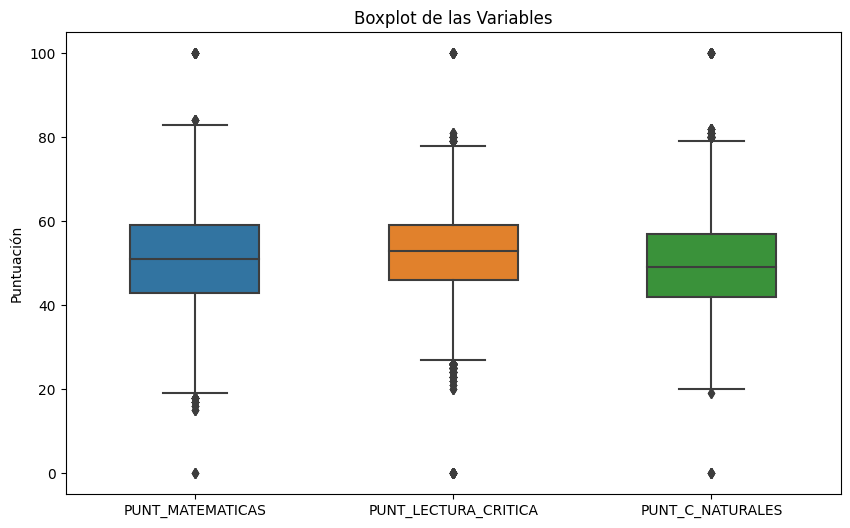

In [19]:
# Implementa tu respuesta en esta celda
variables = ['PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA', 'PUNT_C_NATURALES']

# Crear un solo gráfico de caja para las tres variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=resultados_icfes_5[variables], orient="v", width=0.5)
plt.title("Boxplot de las Variables")
plt.ylabel("Puntuación")
plt.xticks(range(3), variables)  # Etiquetar los ejes x con el nombre de las variables
plt.show()



#### Análisis de Boxplots 

##### PUNT_MATEMATICAS
En el gráfico de caja para PUNT_MATEMATICAS, se observa una mayor variabilidad en comparación con las otras dos materias. Esto se refleja en los extremos más largos del boxplot, indicando la presencia de valores atípicos más distantes de la mediana.

##### PUNT_LECTURA_CRITICA
El gráfico de caja para PUNT_LECTURA_CRITICA muestra una variabilidad moderada y tiene la media de puntuación más alta de las tres materias. La caja del boxplot es más corta en comparación con PUNT_MATEMATICAS, lo que sugiere una concentración de puntuaciones alrededor de la mediana con menos valores atípicos lejanos. Esta variable tiene la media más alta en comparación de las otras dos.

##### PUNT_C_NATURALES
PUNT_C_NATURALES tiene la media de puntuación más baja de las tres materias y también muestra una variabilidad moderada. Aunque la caja es un poco más corta que la de PUNT_MATEMATICAS, aún existe una dispersión considerable de puntuaciones.

En resumen, los boxplots permiten comparar de manera efectiva la distribución de las puntuaciones en estas tres materias y destacan las diferencias en términos de variabilidad y tendencia central.

c. (5%) Identifique el departamento que tiene los puntajes globales más altos. Identifique el que tiene los mejores puntajes en matemáticas.

C:\Users\David\AppData\Local\Temp\ipykernel_19904\914233374.py:15: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.tight_layout()
C:\Users\David\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


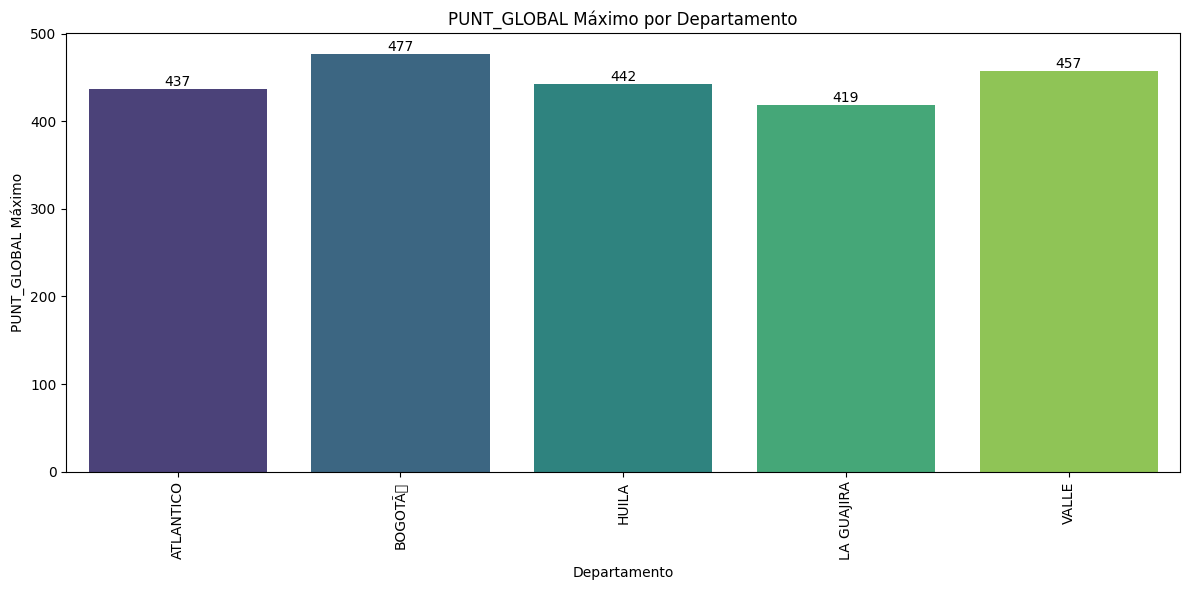

In [25]:
# Implementa tu respuesta en esta celda
# Create a bar plot
max_scores = resultados_icfes_5.groupby('ESTU_DEPTO_RESIDE')['PUNT_GLOBAL'].max().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='ESTU_DEPTO_RESIDE', y='PUNT_GLOBAL', data=max_scores, palette='viridis')
plt.xlabel('Departamento')
plt.ylabel('PUNT_GLOBAL Máximo')
plt.title('PUNT_GLOBAL Máximo por Departamento')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability

# Annotate bars with their values
for index, row in max_scores.iterrows():
    ax.text(index, row['PUNT_GLOBAL'], str(row['PUNT_GLOBAL']), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Aqui vemos que el puntuaje maximo estuvo en Bogotá, el cual fue 477, seguido del valle con 457 y asi los otros.


C:\Users\David\AppData\Local\Temp\ipykernel_19904\1463038002.py:13: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.tight_layout()
C:\Users\David\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


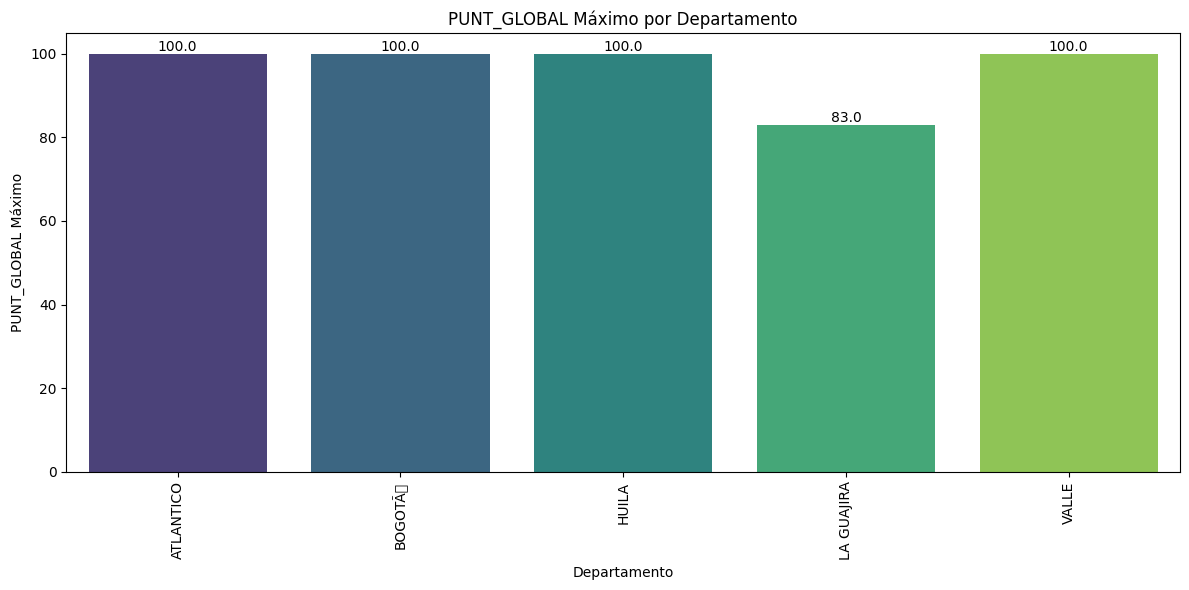

In [28]:
max_scores = resultados_icfes_5.groupby('ESTU_DEPTO_RESIDE')['PUNT_MATEMATICAS'].max().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='ESTU_DEPTO_RESIDE', y='PUNT_MATEMATICAS', data=max_scores, palette='viridis')
plt.xlabel('Departamento')
plt.ylabel('PUNT_GLOBAL Máximo')
plt.title('PUNT_GLOBAL Máximo por Departamento')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability

# Annotate bars with their values
for index, row in max_scores.iterrows():
    ax.text(index, row['PUNT_MATEMATICAS'], str(row['PUNT_MATEMATICAS']), ha='center', va='bottom')

plt.tight_layout()
plt.show()

C:\Users\David\AppData\Local\Temp\ipykernel_19904\2508953584.py:10: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.tight_layout()
C:\Users\David\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


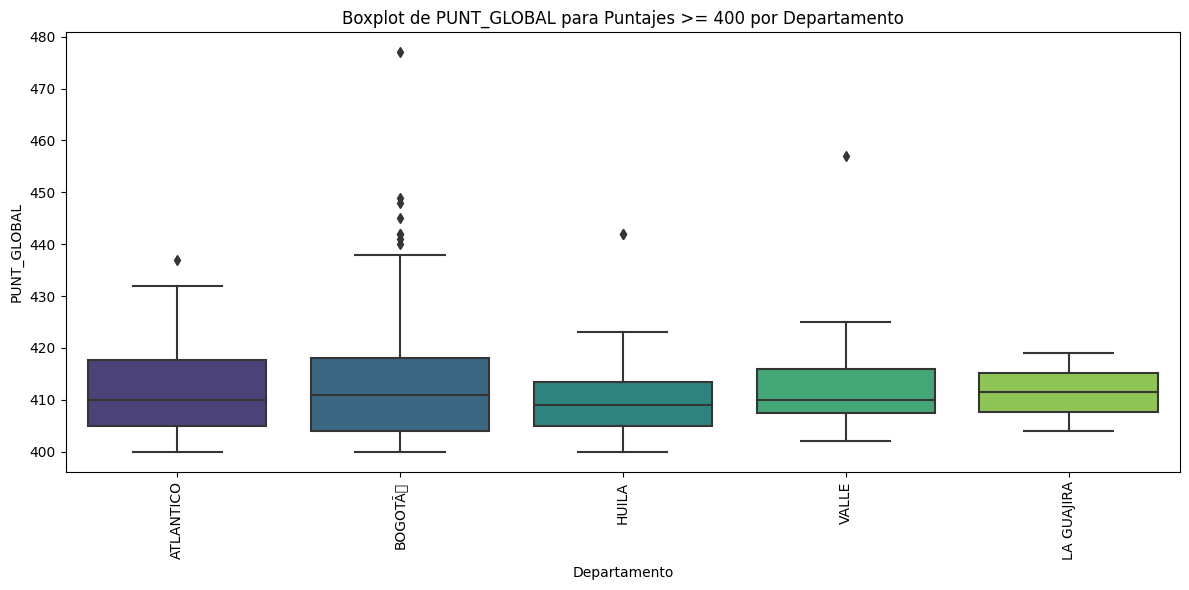

In [29]:
filtered_data = resultados_icfes_5[resultados_icfes_5['PUNT_GLOBAL'] >= 400]

# Create a boxplot for each ESTU_DEPTO_RESIDE
plt.figure(figsize=(12, 6))
sns.boxplot(x='ESTU_DEPTO_RESIDE', y='PUNT_GLOBAL', data=filtered_data, palette='viridis')
plt.xlabel('Departamento')
plt.ylabel('PUNT_GLOBAL')
plt.title('Boxplot de PUNT_GLOBAL para Puntajes >= 400 por Departamento')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

Otra vez vemos que Bogotá tiene los puntajes más altos, esto es si vemos la variabilidad vemos mas puntajes mas altos comparados con los otros departamentos 


C:\Users\David\AppData\Local\Temp\ipykernel_19904\1699483804.py:10: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.tight_layout()
C:\Users\David\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


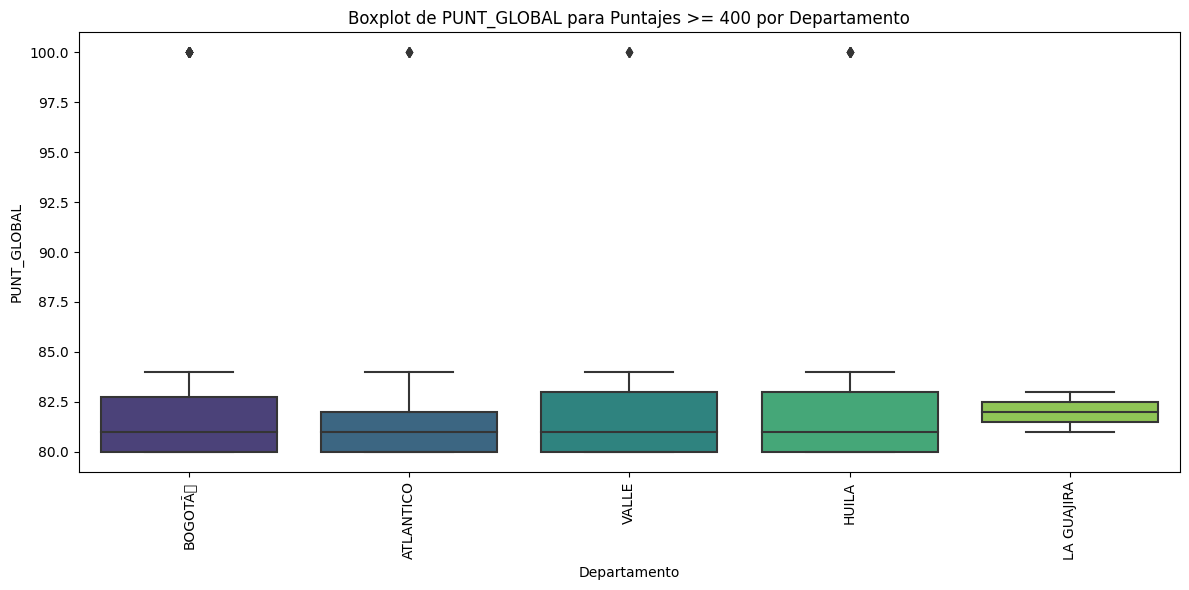

In [32]:
filtered_data = resultados_icfes_5[resultados_icfes_5['PUNT_MATEMATICAS'] >= 80]

# Create a boxplot for each ESTU_DEPTO_RESIDE
plt.figure(figsize=(12, 6))
sns.boxplot(x='ESTU_DEPTO_RESIDE', y='PUNT_MATEMATICAS', data=filtered_data, palette='viridis')
plt.xlabel('Departamento')
plt.ylabel('PUNT_GLOBAL')
plt.title('Boxplot de PUNT_GLOBAL para Puntajes >= 400 por Departamento')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

d. (5%) Muestre en una tabla el número de estudiantes que pertenece a colegios oficiales y no oficiales. Ilustre mediante una gráfica. ¿Cree Ud. que los resultados del puntaje global se ven influenciado por el tipo de colegio?

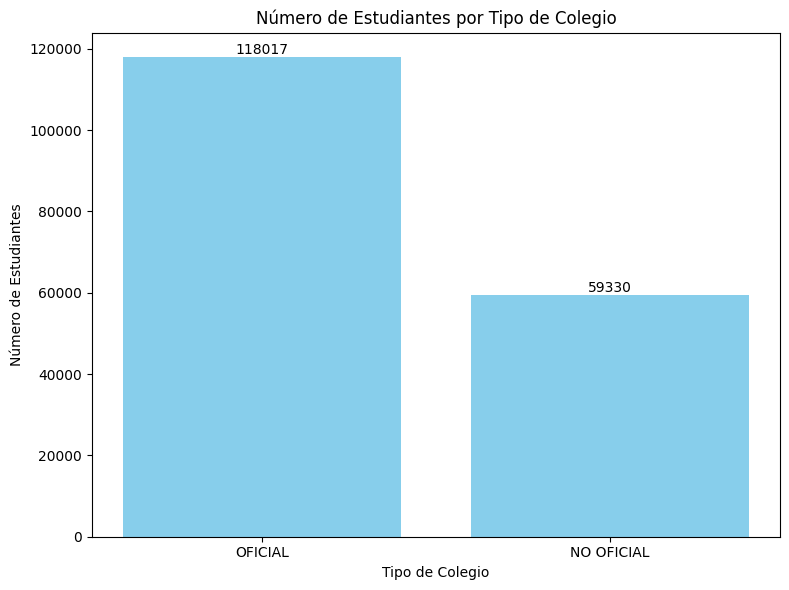

In [35]:
conteo_colegios = resultados_icfes_5['COLE_NATURALEZA'].value_counts()

# Crear una tabla para mostrar los resultados
tabla_conteo = pd.DataFrame({
    'Tipo de Colegio': conteo_colegios.index,
    'Número de Estudiantes': conteo_colegios.values
})

# Crear una gráfica de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(tabla_conteo['Tipo de Colegio'], tabla_conteo['Número de Estudiantes'], color='skyblue')
plt.xlabel('Tipo de Colegio')
plt.ylabel('Número de Estudiantes')
plt.title('Número de Estudiantes por Tipo de Colegio')
plt.xticks(rotation=0)  # Sin rotación en las etiquetas del eje x

# Agregar los números de estudiantes en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.tight_layout()
plt.show()


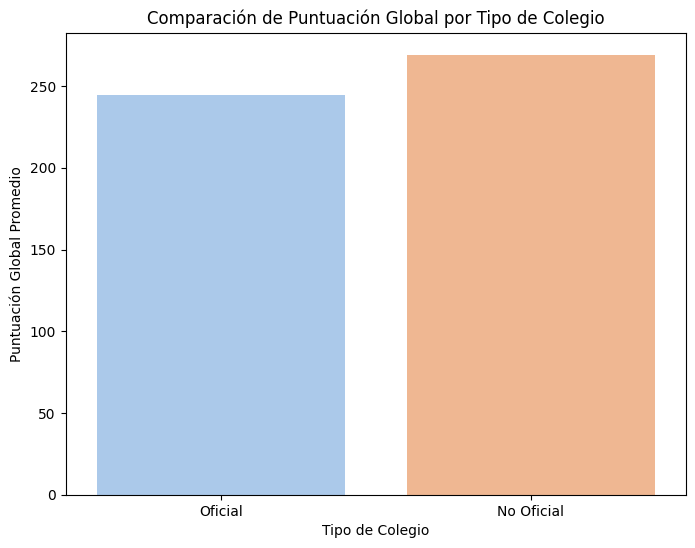

In [33]:
colegio_oficial = resultados_icfes_5[resultados_icfes_5['COLE_NATURALEZA'] == 'OFICIAL']
colegio_no_oficial = resultados_icfes_5[resultados_icfes_5['COLE_NATURALEZA'] == 'NO OFICIAL']

# Calcular las puntuaciones promedio para cada categoría
promedio_oficial = colegio_oficial['PUNT_GLOBAL'].mean()
promedio_no_oficial = colegio_no_oficial['PUNT_GLOBAL'].mean()

# Crear una gráfica de barras comparando las puntuaciones promedio
plt.figure(figsize=(8, 6))
sns.barplot(x=['Oficial', 'No Oficial'], y=[promedio_oficial, promedio_no_oficial], palette='pastel')
plt.xlabel('Tipo de Colegio')
plt.ylabel('Puntuación Global Promedio')
plt.title('Comparación de Puntuación Global por Tipo de Colegio')
plt.show()

Personalmente, me llama la atención que casi la mitad de los estudiantes se encuentren en colegios no oficiales. Esto sugiere que hay una gran cantidad de estudiantes que asisten a este tipo de instituciones. Desde mi perspectiva, creo que el estatus oficial de un colegio puede tener un impacto importante en la calidad de la educación que se proporciona. Mi opinión es que cuando un colegio es oficial, ha pasado por un proceso de validación que incluye la evaluación de la calidad de los profesores y otros aspectos educativos. Creo que esto podría influir en los resultados de los exámenes ICFES.

Además, tengo la hipótesis de que las personas que van a colegios no oficiales pueden enfrentar desafíos relacionados con la disponibilidad de recursos. Esto podría afectar la calidad de la educación que reciben y las condiciones en las que estudian. Desde mi punto de vista, esto podría tener un impacto negativo en sus puntajes, en comparación con aquellos que asisten a colegios oficiales.

e. (5%) ¿Cree usted que hay alguna relación entre el puntaje global y el estrato del 
estudiante? 

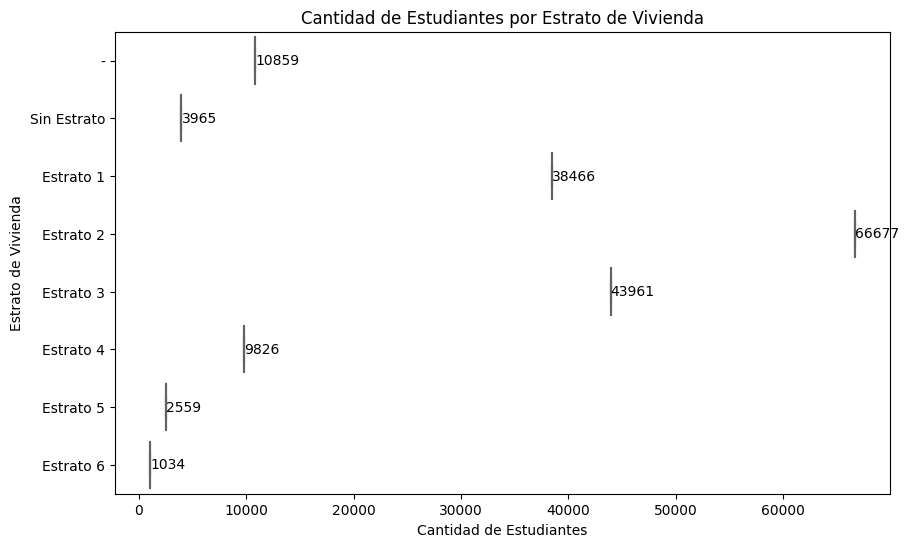

In [40]:
orden_estratos = ['-', 'Sin Estrato', 'Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6']

# Contar el número de estudiantes por cada estrato de vivienda
estudiantes_por_estrato = resultados_icfes_5['FAMI_ESTRATOVIVIENDA'].value_counts().reset_index()
estudiantes_por_estrato.columns = ['Estrato de Vivienda', 'Cantidad de Estudiantes']

# Crear un gráfico de caja (box plot) para la cantidad de estudiantes por estrato con el orden personalizado
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cantidad de Estudiantes', y='Estrato de Vivienda', data=estudiantes_por_estrato, palette='Set3', orient='h',
            order=orden_estratos)

# Agregar números de estudiantes en las cajas
for index, row in estudiantes_por_estrato.iterrows():
    plt.text(row['Cantidad de Estudiantes'], orden_estratos.index(row['Estrato de Vivienda']), 
             str(row['Cantidad de Estudiantes']), va='center')

plt.xlabel('Cantidad de Estudiantes')
plt.ylabel('Estrato de Vivienda')
plt.title('Cantidad de Estudiantes por Estrato de Vivienda')
plt.show()

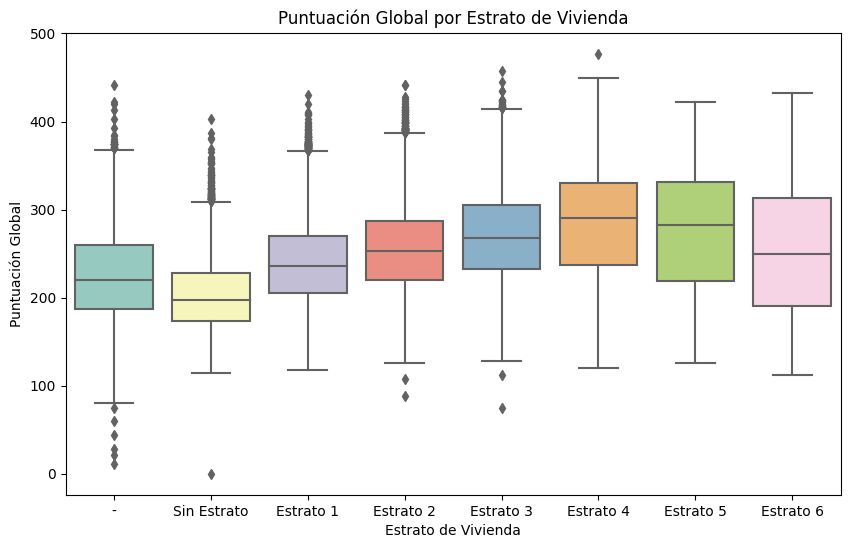

In [43]:
orden_estratos = ['-', 'Sin Estrato', 'Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6']

# Crear un gráfico de caja (box plot) para la puntuación global por estrato con el orden personalizado en el eje y
plt.figure(figsize=(10, 6))
sns.boxplot(x='FAMI_ESTRATOVIVIENDA', y='PUNT_GLOBAL', data=resultados_icfes_5, palette='Set3', 
            order=orden_estratos)  # Establecer el orden en el eje y

plt.xlabel('Estrato de Vivienda')
plt.ylabel('Puntuación Global')
plt.title('Puntuación Global por Estrato de Vivienda')
plt.xticks(rotation=0)  # Sin rotación en las etiquetas del eje x
plt.show()

Desde mi perspectiva, encuentro realmente interesante la relación que parece existir entre el estrato de vivienda y los resultados en las pruebas ICFES. Creo que, en efecto, existe una correlación, pero hasta cierto punto. El estrato de una persona puede proporcionarnos información sobre su situación socioeconómica, y esto a su vez puede ser un reflejo de diversos factores que influyen en su rendimiento académico.

Uno de los factores clave es el acceso a recursos de calidad, como alimentos nutritivos, colegios bien equipados y, lo que es fundamental, profesores altamente calificados. Las personas con mejores recursos pueden optar por colegios donde los docentes están mejor preparados y, en general, reciben una educación de mayor calidad. Esto se traduce en mejores resultados en las pruebas del ICFES.

Además, considero que el tiempo disponible para el estudio es un elemento crucial. En estratos más altos, es más probable que los jóvenes no tengan que trabajar para contribuir económicamente al hogar, lo que les permite dedicar más tiempo al estudio. En contraste, en estratos más bajos, a menudo, la necesidad económica obliga a los jóvenes a trabajar, lo que puede limitar su capacidad para dedicar tiempo suficiente al aprendizaje.

No obstante, existe un punto interesante que subrayas: llega un momento en el que el dinero ya no es una ventaja determinante. Esto se evidencia en estratos 5 y 6, donde los jóvenes, independientemente del estrato, pueden acceder a una educación de calidad. En estos casos, el acceso a recursos adicionales, como clases particulares con los mejores profesores o la matriculación en colegios de élite, se convierte en una posibilidad para todos.

## Ejercicio 2

(30%) Teniendo en cuenta los resultados obtenidos por los estudiantes en sus pruebas ICFES una academia dedicada a cursos pre-icfes decidió ofertar una variedad de cursos con el fin de lograr que los estudiantes obtengan puntajes mayores a 400 puntos. La academia optó por desarrollar 4 cursos distintos, estos están pensados variando la intensidad de horas de la siguiente manera; intensivo (2 horas díarias), semi-intensivo (4 horas semanales), semanal (5 horas en un solo día) y super intensivo (3 horas diarias).En la base de datos cursos.cvs, encontrara los resultados obtenidos por los estudiantes de acuerdo con el curso tomado. Con base en la información, conteste las siguientes preguntas: <br>

a. (10%) Realice estadísticas descriptivas (promedio, frecuencia, desviación, entre otros) que permitan observar diferencias de los puntajes obtenidos por los estudiantes según el curso tomado y concluya

In [ ]:
# Implementa tu respuesta en esta celda



b. (10%) Un estudiante que se encuentra indeciso por el curso a tomar considera que el 
curso intensivo y el curso super intensivo no tienen ninguna diferencia. ¿Está de acuerdo 
con esta afirmación?

In [ ]:
# Implementa tu respuesta en esta celda



c. (10%) Uno de los profesores de la academia desea conocer los puntajes promedio de los estudiantes con el fin de establecer estrategias para que algún estudiante tenga un puntaje mayor a 483 que es el mejor de la academia, ¿cree usted que el profesor puede ayudar a sus estudiantes sugiriéndoles que tomen el curso semanal? ¿Qué curso cree usted que debe sugerir el profesor a sus estudiantes teniendo en cuenta los resultados que se han obtenido? <br>

In [ ]:
# Implementa tu respuesta en esta celda



## Ejercicio 3

(30%) Battlife se dedica a la producción de baterías, se sabe la vida útil promedio de sus baterías siguen una distribución normal con una media de 800 horas y una varianza 𝜎2. Un grupo de ingenieros quieren verificar que esta afirmación sea veraz, por lo tanto deciden tomar una muestra aleatoria de 30 baterías con las cuales obtienen que la vida útil promedio es de 790 horas, con una desviación estándar muestral de 50 horas.

a. (10%) ¿Cuál es la probabilidad de que la vida útil promedio real de las baterías sea 
menor a 780 horas?

In [ ]:
# Implementa tu respuesta en esta celda



b. (10%) Un comprador está interesado en adquirir un lote de baterías, sin embargo, solicitó que, en una muestra de 40 baterías, la variabilidad de las vidas útiles no debe exceder 2500 horas. Calcule la probabilidad de que la varianza de las vidas útiles de una muestra de 40 baterías supere este valor

In [ ]:
# Implementa tu respuesta en esta celda



c. (10%) El área de desarrollo esta haciendo un estudio de mercado dado que desean que las baterías producidas sean las que tengan la mejor vida útil del mercado. Por lo cual, se han obtenido los resultados de una empresa competidora “BattteriesInc”. De “BattteriesInc”. se conoce que la vida útil promedio de las baterías es una variable aleatoria que sigue una distribución Normal con media 𝜇 y varianza 0.005. Se tomó una muestra aleatoria de 20 baterías de Battlife y 15 baterías de BattteriesInc. Asumiendo que las variables aleatorias son independientes, ¿cuál es la probabilidad de que la varianza muestral de la vida útil producida por Battlife menor a la varianza muestral del espesor de la vida útil de BatteriesInc?

In [ ]:
# Implementa tu respuesta en esta celda



## Créditos

__Autores__: Laura Valentina Diaz Pinzon

__Actualizado por__: Alejandra Tabares Pozos. 

__Fecha última actualización__: 01/09/2023